# **DATA VISUALISATION**
----

## Objectives

* Perform detailed Exploratory Data Analysis (EDA) on electricity generation data for European countries from 2010 to 2022.
* Identify key trends in total electricity production, energy source composition, and country-level contributions.
* Separate and compare renewable vs non-renewable electricity generation over time.
* Derive statistical insights (e.g. correlations, totals) and highlight seasonality or anomalies.

## Inputs

* Cleaned dataset: cleaned_european_countries_dataset.csv
* Python libraries: pandas, numpy, matplotlib, seaborn, plotly
* Columns of interest: year, value (GWh), product, country, energy_type

## Outputs

* Multiple visualizations showing:
    * Total electricity generation trend by year (line chart)
    * Electricity generation by top 5 energy sources (multi-line chart)
    * Renewable vs non-renewable generation (stacked/grouped bar chart)
    * Renewable source trends (solar, wind, hydro, etc.)
    * Total generation by country (bar chart)
    * Correlation matrix between 'value', 'yeartodate', 'previousyeartodat'e, and 'share'
* Prepared data for use in Power BI dashboard and future predictive modeling

## Additional Comments

* Error bars were preserved in bar plots to reflect variability and confidence in generation data.
* Renewable classification was manually curated based on energy source names.
* This EDA serves as the foundation for the upcoming predictive analysis.
* The same dataset will also use in Power BI dashboard, offering interactive insights for stakeholders.

---

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_european_countries_dataset.csv')
df.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
0,Austria,2010,1,Hydro,2579.264,39502.566,0.0,0.437055,2010-01-01
1,Austria,2010,1,Solar,2.864,84.421,0.0,0.000485,2010-01-01
2,Austria,2010,1,Geothermal,0.111,1.332,0.0,0.000019,2010-01-01
3,Austria,2010,1,Total combustible fuels,3117.160,26042.221,0.0,0.528201,2010-01-01
4,Austria,2010,1,Coal,693.730,6371.891,0.0,0.117552,2010-01-01


----

## 1. Overall Electricity Generation in Europe by Year
A line chart below shows the overall electricity generation in Europe from 2010 to 2022.

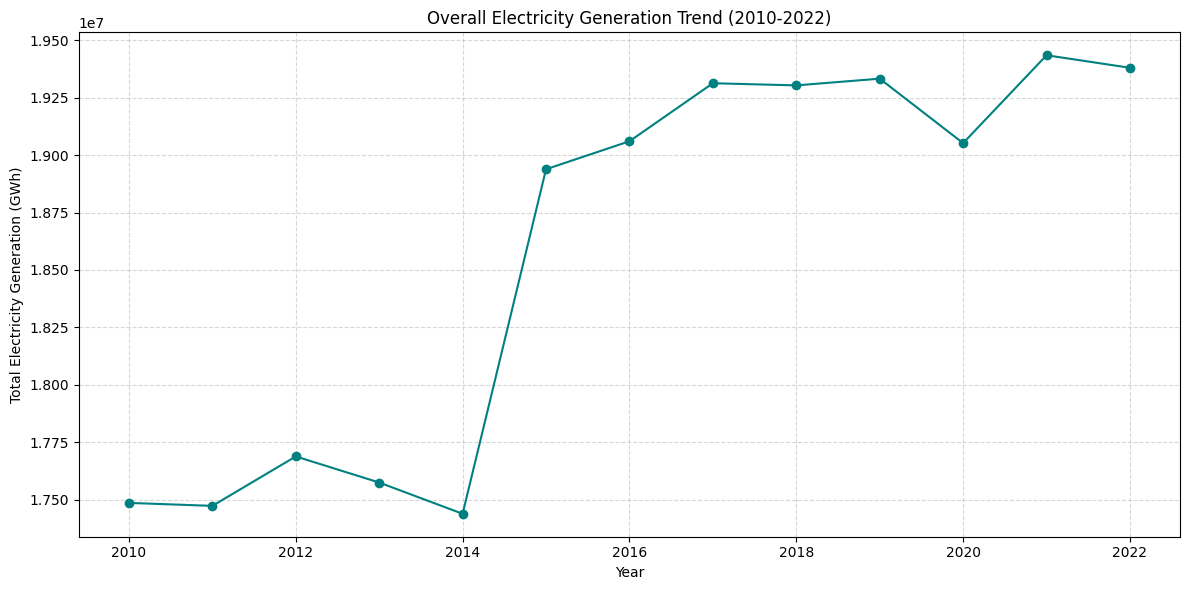

In [ ]:
# Electricity generation over time using matplotlib
# Group by year and sum total electricity generation
yearly_generation = df.groupby('year')['value'].sum()

plt.figure(figsize=(12, 6))
yearly_generation.plot(marker='o', color='teal')
plt.title('Overall Electricity Generation Trend (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Generation (GWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insights: 
* A line chart showing the total electricity produced each year (2010–2022) in Europe.
* Trend increases: Suggests growing energy demand or increased production capacity.
* There's a drop around 2020: Could relate to COVID-19 pandemic, with lower industrial activity.
* Fluctuations: Indicate variability in production possibly due to weather, policy changes, or fuel availability.
----

## 2. Electricity Generation Trend by Top 5 Energy Sources
A line chart below visualizes the electricity generation trends for the top 5 most common energy sources in Europe from 2010 to 2022. Each line represents a different product, allowing us to compare their growth, decline, and overall contribution to the region’s energy mix over time. 

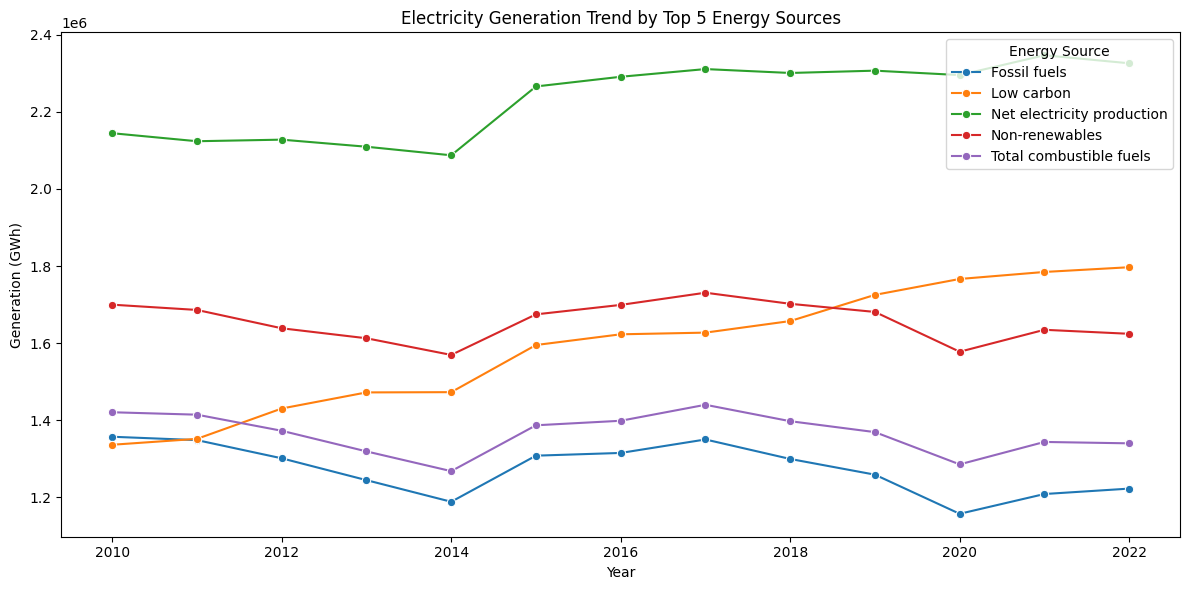

In [ ]:
# Elecricity generation by top 5 products using seaborn
# Get top 5 most frequent products
top_products = df['product'].value_counts().head(5).index.tolist()

# Filter dataset
top_product_df = df[df['product'].isin(top_products)]

# Group by year and product
product_trend = top_product_df.groupby(['year', 'product'])['value'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_trend, x='year', y='value', hue='product', marker='o')
plt.title("Electricity Generation Trend by Top 5 Energy Sources")
plt.ylabel("Generation (GWh)")
plt.xlabel("Year")
plt.legend(title="Energy Source")
plt.tight_layout()
plt.show()

### Insights:
* Trends of the top 5 most common energy sources  across the years.
* Net electricity production remained stable, peaking slightly around 2017.
* Low-carbon sources (renewables + nuclear) rose steadily, showing Europe's shift to clean energy.
* Non-renewables declined overall but saw a small rebound after 2020.
* Fossil fuels show a clear downward trend, with some recovery due to external factors.
* Total combustible fuels are gradually decreasing, hinting at improved efficiency or fuel switching.
* Overall, Europe is transitioning toward cleaner energy, but fossil fuels still play a backup role.

-----

## 3. Renewable vs Non-Renewable Electricity Generation Over Time
A bar chart below compares the total renewable and non-renewable electricity generation in Europe for each year from 2010 to 2022. This visualization highlights the persistent dominance of non-renewables, while showing the gradual increase in renewables over time.

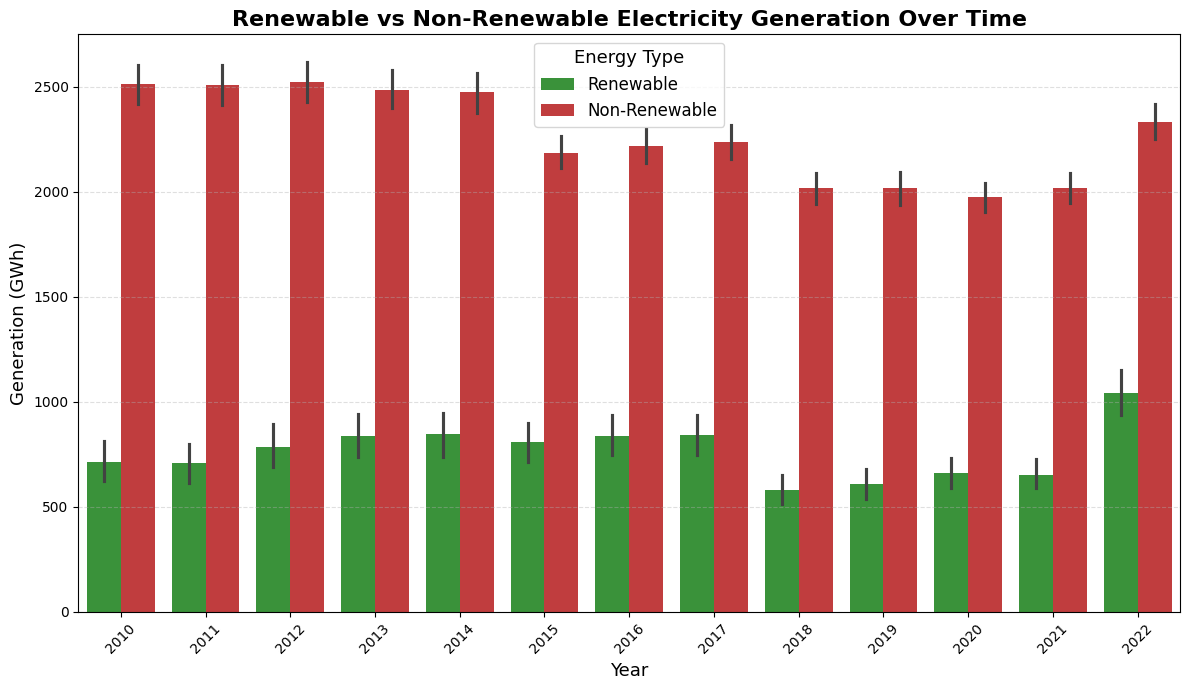

In [ ]:
# renewable vs non-renewable using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df, 
    x='year', 
    y='value', 
    hue='energy_type', 
    palette={'Renewable': '#2ca02c', 'Non-Renewable': '#d62728'}
)
plt.title("Renewable vs Non-Renewable Electricity Generation Over Time", fontsize=16, weight='bold')
plt.ylabel("Generation (GWh)", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.legend(title="Energy Type", fontsize=12, title_fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Insights: 
* The black lines on each bar represent error bars indicating variability in electricity generation across months within the same year. They provide insight into the consistency of energy generation.
* Non-renewable energy dominates electricity generation across all years. There’s a slight increase in renewable generation, especially after 2015.
* Electricity generation from renewable energy sources has gradually increased.
* The gap between the two remains wide, showing limited convergence. Europe is adding renewables, but still heavily relies on fossil fuels. The pace of the energy transition appears gradual, not aggressive.
----

## 4. Electricity Generation Trend by Country
A bar chart below shows the total electricity generation by country in Europe from 2010 to 2022. The chart highlights which countries are the largest producers, reflecting differences in population, industrial capacity, and energy infrastructure.

In [ ]:
# total electricity generation by country using plotly
# Calculate total electricity generation by country
top_countries = df.groupby('country_name')['value'].sum().sort_values(ascending=False)

# Plotting electricity generation over time by country using plotly
fig = px.bar(
    x=top_countries.index,
    y=top_countries.values,
    labels={'x': 'Country', 'y': 'Total GWh'},
    title='Total Electricity Generation by Country (2010–2022)'
)
fig.update_layout(xaxis_tickangle=45)
fig.show()

### Insights:
* Germany leads by a large margin, producing over 26 million GWh.
* Italy, UK, France, Spain, and Republic of Turkey follow as major producers.
* Smaller nations like Malta, Luxembourg, and Cyprus have very low generation.
* This reflects differences in population, industrial size, and energy infrastructure.
* Western and Central Europe dominate total production, likely due to higher energy demand and capacity.
----

## 5. Electricity Generation by Renewable Source Over Time
A multi-line plotly chart below visualizes the monthly electricity generation by each renewable source in Europe from 2010 to 2022. Each line represents a different renewable energy type (Wind, Solar, Hydro, Geothermal, etc.), allowing us to compare their growth and seasonal patterns over time. This interactive chart helps highlight the rapid expansion of solar and wind, the steady contribution of hydro, and the overall upward trend in renewables.

In [ ]:
# Electricity generation by renewable sources using plotly
# list with all renewable sources
renewable_products = [
    'Wind', 'Solar', 'Hydro', 'Geothermal',
    'Other renewables', 'Other renewables aggregated',
    'Combustible renewables', 'Renewables'
]

# Filter for renewable products only
df_renewable = df[df['product'].isin(renewable_products)]

# Group by date and product, and sum the values
renewable_generation = df_renewable.groupby(['date', 'product'])['value'].sum().reset_index()

# Plot separate lines for each renewable product
fig = px.line(
    renewable_generation,
    x='date',
    y='value',
    color='product',
    labels={
        'value': 'Electricity Generation (GWh)',
        'date': 'Date',
        'product': 'Renewable Source'
    },
    title='Electricity Generation by Renewable Source Over Time (2010–2022)'
)

fig.update_layout(template='plotly_white')
fig.show()

### Insights:
* Total renewables (light blue) steadily increased, showing a strong upward trend in clean energy use.
* Wind and Hydro (green and teal) are the two major contributors among individual sources.
* Solar (red) has grown significantly since 2012, showing rapid expansion despite seasonal dips.
* Combustible renewables and Geothermal have remained relatively flat and low.
* Seasonality is visible in Hydro and Solar due to weather-dependent generation.
* Overall, Europe’s renewable energy mix diversified, with most sources growing year by year.
----

## 6. Correlation matrix for numerical columns
A correlation matrix for numerical values helps reveal relationships between key metrics in the dataset, such as total electricity generation, year-to-date values, previous year comparisons, and share percentages. This visualization highlights which variables move together, indicating possible dependencies or trends, and can guide further analysis on factors influencing electricity production across Europe.

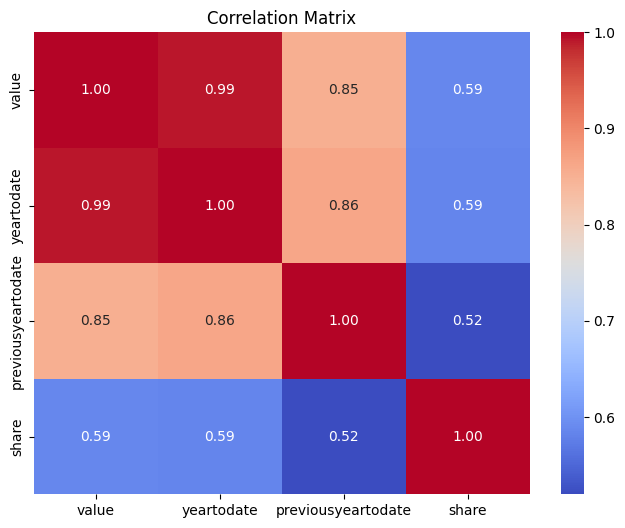

In [ ]:
# Correlation matrix for numerical columns using seaborn
corr = df[[ 'value', 'yeartodate', 'previousyeartodate', 'share']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights: 
* 'value' and 'yeartodate' have a very strong positive correlation (0.99), indicating they trend together over time.
* 'previousyeartodate' also correlates strongly with both 'value' and 'yeartodate' (0.85+), showing consistency across years.
* 'share' has a moderate positive correlation with the other variables, especially value (0.59), suggesting partial dependency.
* The lowest correlation is between 'share' and 'previousyeartodate' (0.52), implying more independent variation.
* Overall, the matrix shows strong internal consistency across time-based metrics with slightly weaker links to share.
---